# Bayesian inference on Gaussians
## Consider the following generative model:  $z \longrightarrow x$, with prior distribution $p\left(z\right) = \mathcal{N}(z\;|\;\mu_z, \Sigma_z)$ and likelihood function $p\left(x\;|\;z\right) = \mathcal{N}\left(x\;|\;\mu_{x|z}, \Sigma_{x|z}\right)$ where $\mu_{x|z} = Az$. 

### We will consider only the univariate case in this exercise, hence $z$ and $x$ are univariate.

### Read carefully and answer all questions. You are required to ensure you write code for all tasks as described below and corresponding plots.

In [1]:
# setting up
import numpy as np
from numpy.random import default_rng
import seaborn as sns
import matplotlib.pyplot as plt
import random

seed = 42
rng = default_rng(seed=seed)

# Prior distribution $\mathcal{N}(z\;|\;\mu_z, \Sigma_z)$

Set $mu_z$ and $\Sigma_z$ to be non-zero scalars of your choice ($\Sigma_z$ is now just $\sigma_z^2$), and draw 10,000 random samples from the prior distribution $\mathcal{N}(\mu_z, \sigma_z^2)$ and visualize the sampled points as a histogram. Experiment by increasing and decreasing values for $mu_z$ and $\sigma_z$ (at least two sets).

<span style="color:orange">IMPORTANT: Ensure that the y-axis of all the histograms in this exercise represent densities.</span>

In [2]:
def prior(mu_z, sigma_z, N_samples=10000):
    # For z following a univariate distribution, we can use the following function making use of the seed
    z = rng.normal(loc = mu_z, scale = sigma_z, size = N_samples)
    return z


def plot_histogram(data: np.array, title: str, x_label: str, y_label: str, xlim: tuple[int, int], x_tick_steps: int = 10):
    """
    Plots a histogram
    args:
     - data: data to be ploted
     - title: plot title
     - x_label: label of the x-axis
     - y_label: label of the y-axis
     - xlim: min and max values for the plot
     - x_tick_steps: every how many steps should a bin be created.
    """
    _, ax = plt.subplots()
    sns.histplot(data, ax=ax, stat="density")
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_xticks(range(xlim[0], xlim[1], x_tick_steps))
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.show()


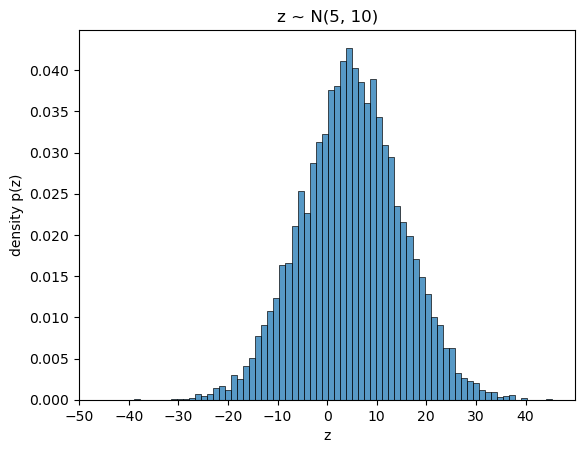

In [3]:
# use values given in plot_histogram
mu_z = 5
sigma_z = 10
z = prior(mu_z, sigma_z)

plot_histogram(z, title="z ~ N(5, 10)", x_label="z", y_label="density p(z)", xlim=(-50, 50))

In [4]:
# Verify working seed: sum aof probabilities should be 48975.01245859883 for seed = 42
print(f'Sum of all frequencies: {z.sum()}')

Sum of all frequencies: 48975.01245859883


### Repeat and show plots for at least one more set of parameter values

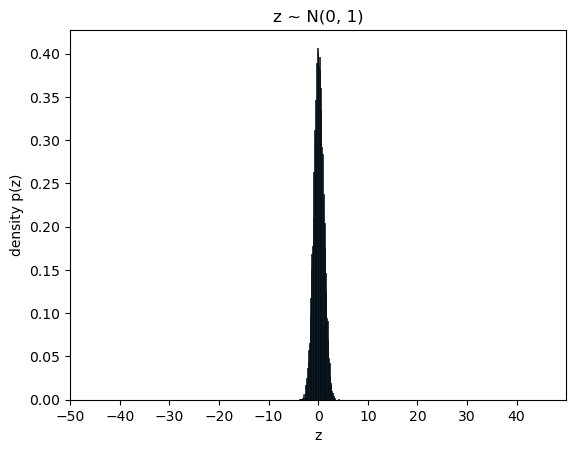

In [5]:
# standard normal gaussian
mu_z = 0
sigma_z = 1
z = prior(mu_z, sigma_z)

plot_histogram(z, title="z ~ N(0, 1)", x_label="z", y_label="density p(z)", xlim=(-50, 50))

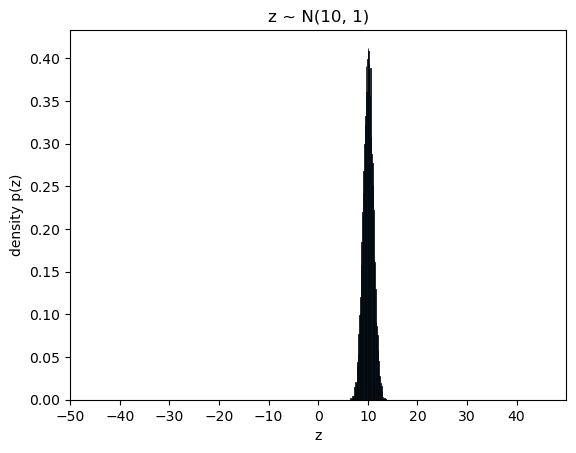

In [6]:
# increase expaectation by 10
mu_z = 10
sigma_z = 1
z = prior(mu_z, sigma_z)

plot_histogram(z, title="z ~ N(10, 1)", x_label="z", y_label="density p(z)", xlim=(-50, 50))

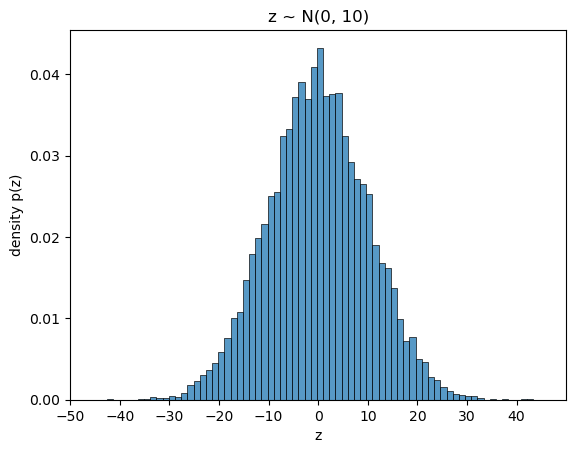

In [7]:
mu_z = 0
sigma_z = 10
z = prior(mu_z, sigma_z)

plot_histogram(z, title="z ~ N(0, 10)", x_label="z", y_label="density p(z)", xlim=(-50, 50))

<span style="color:orange">IMPORTANT: Finally choose one set of samples of z to use in the subsequent tasks.</span>

## Question 1: How does the shape of the histogram change when you vary the mean and variance?

Answer here: A change in variance changes the width of the graph. By increasing the variance/standard deviation, the width of the distribution increases and vice versa. A change in in mean translates the distribution horizontally. An increase of the mean translates it to the right and vice versa.

# Likelihood function $\mathcal{N}\left(x\;|\;\mu_{x|z}, \Sigma_{x|z}\right)$

### Compute $\mu_{x|z_i} = Az_i$ with a non-zero scalar value of your choice for $A$, but by using only one random sample of $z$, $z_i \sim p(z)$  from above. 

Using the computed $\mu_{x|z_i}$ and by setting $\Sigma_{x|z}$ to be a scalar of your choice, draw 10,000 random samples from $p\left(x\;|\;z=z_i\right)$.
Plot a histogram of the 10,000 samples from $p\left(x\;|\;z=z_i\right)$ to visualize its density.

In [8]:
# define prior for the rest of the sheet
mu_z = 10
sigma_z = 10
z = prior(mu_z, sigma_z) # your prior samples

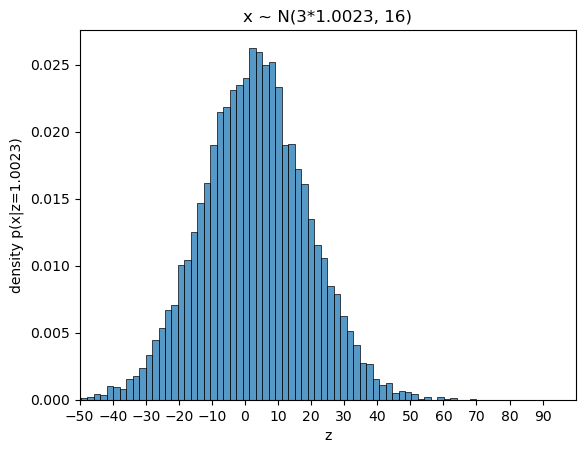

In [9]:
sigma_x_z = 16   # fix this value for sigma_x_z for all subsequent tasks under the univariate case.
A = 3            # fix this value for A for all subsequent tasks under the univariate case.

def likelihood(zi, A, sigma_x_z, N_samples=10000):
    mu_x_zi = A * zi # compute mu_x_zi
    x_zi = rng.normal(loc = mu_x_zi, scale = sigma_x_z, size = N_samples) # Sample 10,000 points from the likelihood function using numpy.random.Generator's normal density
    return x_zi

z_i = z[0] # Choose one sample of z to use in the subsequent tasks 
# in this case we simply pick the first value in our list of samples
x_zi = likelihood(z_i, A, sigma_x_z)


# plot histogram of p(x | z=z_i)
plot_histogram(x_zi, title="x ~ N({0}*{1}, 16)".format(A, round(float(z_i),4)), x_label="z", y_label=f"density p(x|z={round(float(z_i),4)})", xlim=(-50, 100))

<span style="color:orange">
IMPORTANT: Repeat the exercise with two other random samples of z and then drawing 10,000 random samples each
from p(x|z) and visualizing the densities thereof too. Keep the values for sigma_x_z and A fixed as mentioned.
</span>

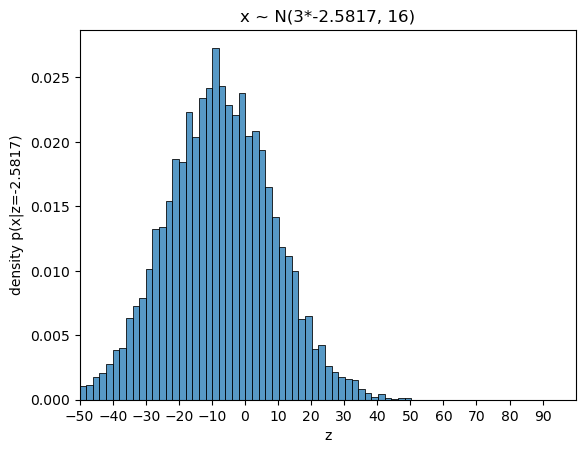

In [10]:
# Repeat here for at least two more sets of samples of z and visualize the densities of the likelihood function.
z_i = z[1]
x_zi = likelihood(z_i, A, sigma_x_z)

# plot histogram of p(x | z=z_i)
plot_histogram(x_zi, title="x ~ N({0}*{1}, 16)".format(A, round(float(z_i),4)), x_label="z", y_label=f"density p(x|z={round(float(z_i),4)})", xlim=(-50, 100))



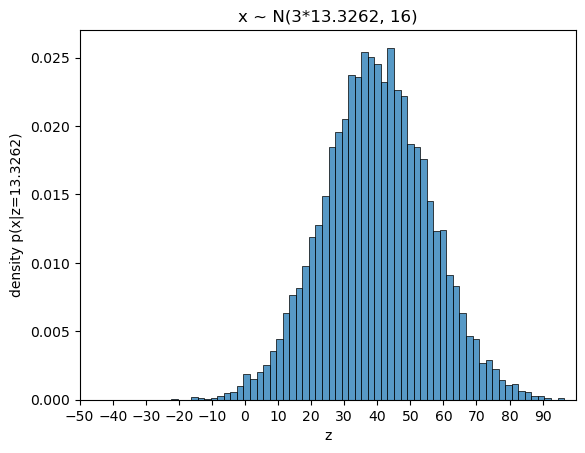

In [11]:
z_i = z[2]
x_zi = likelihood(z_i, A, sigma_x_z)

# plot histogram of p(x | z=z_i)
plot_histogram(x_zi, title="x ~ N({0}*{1}, 16)".format(A, round(float(z_i),4)), x_label="z", y_label=f"density p(x|z={round(float(z_i),4)})", xlim=(-50, 100))


In [12]:
print(f'Priors: {z[0:3]}')

Priors: [ 1.00231827 -2.58172491 13.32616294]


## Question 2: How does using different samples of $z$ affect the distribution $p\left(x\;|\;z\right)$?

Answer here: We can observe that the distribution of x is translated horizontally. The amount of translation depends on A and z. For positive values of z and given A we translate to the right and vice versa, since the mean of the new distribution is euqal to the z value scaled by A.

### Compute $\mu_{x|z} = Az$, with $A$ set above, but this time by using all samples 10,000 of $z$. Draw 10,000 random samples from $p\left(x\;|\;z\right)$ such that you have one $x$ sample corresponding to one $z$ sample.

*Hint: You may find the following identity useful $\mathcal{N}(m,s) = \mathcal{N}(0,s) + m$.*

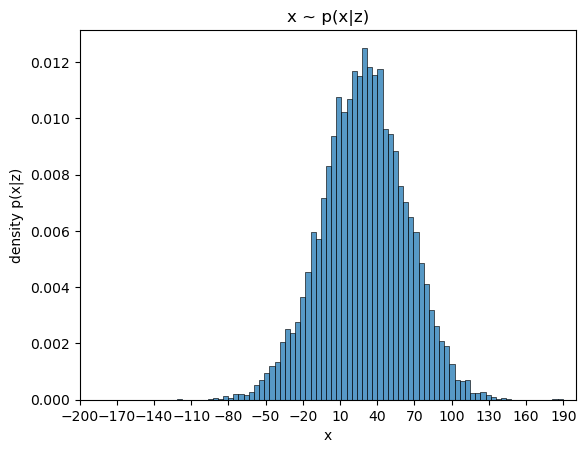

In [13]:
# use the same value for sigma_x_z from above
# use the same value for A from above
def full_likelihood(z, A, sigma_x_z, N_samples=10000):
    mu_x_z = A * z # compute mu_x_z
    
    # We use the hint and sample from a standard normal with given 
    x_z = rng.normal(loc = 0, scale = sigma_x_z, size = N_samples) # Sample 10,000 points from the likelihood function using numpy.random.Generator's normal density

    # Now we translate the samples by the array of linearly scaled samples
    x_z += mu_x_z 
    
    return mu_x_z, x_z

mu_x_z, x_z = full_likelihood(z, A, sigma_x_z)
# plot histogram
plot_histogram(x_z, title="x ~ p(x|z)", x_label="x", y_label="density p(x|z)", xlim=(-200, 200), x_tick_steps=30)

In [14]:
print('mean(x_z) = ', np.mean(x_z))
print('std(x_z)  = ', np.std(x_z))
print('var(x_Z)  = ', np.var(x_z))

mean(x_z) =  29.366184174959734
std(x_z)  =  33.88970048611496
var(x_Z)  =  1148.5117990385804


In [15]:
print('A*mu_z = ', A*mu_z)
print('sqrt(sigma_z**2 + A**2*sigmax_z**2) =', np.sqrt(sigma_x_z**2 + A**2*sigma_z**2))

A*mu_z =  30
sqrt(sigma_z**2 + A**2*sigmax_z**2) = 34.0


<span style="color:orange">IMPORTANT: use this set of `x_z` (which is x|z) for posterior computation below.</span>

## Question 3: How does $p(x\;|\;z)$ look like now, considering all $z$ samples and one $x$ sample per $z$ sample? Is it different from Question 2? Elaborate.

Answer here: Yes it is very different!

All in all we have two gaussian distribution, which we add together to obtain another gaussian. The first gaussian distribution is the distribution of mu_x_z which is the transformed distribution of z. Since z is normally distributed with mean = 10 and variance = 10^2 = 100, the linear scaling of z with A translates it to the right and the new mean is A * z = 3 * 10 = 30 and the variance (which is quadratic) is scaled by A^2. x_z is normally distributed with mean = 0 and variance = 16^2. When we then proceed to add x_z and mu_x_z resulting in a new x_z, we add these gaussians together. However, they both differ in variance/standard deviation. For a sum of gaussians x_z, the variance of the sum is equal to the sum of variances. This results in a higher overall variance of the new distribution. Therefore, the resulting distribution is a translation and wider (this also partially answers Q4).

### Now plot $\mu_{x|z}$ above computed using all samples of $z$ above as a histogram to visualize the probability distribution of $\mu_{x|z}$ itself.

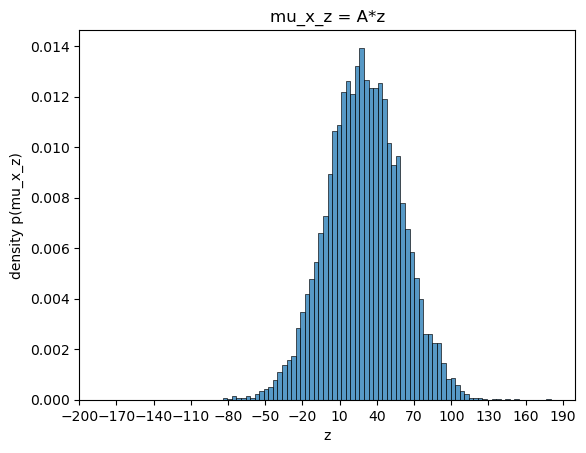

In [16]:
plot_histogram(mu_x_z, title="mu_x_z = A*z", x_label="z", y_label="density p(mu_x_z)", xlim=(-200, 200), x_tick_steps=30)

In [17]:
print("mean(mu_x_z) = ", np.mean(mu_x_z))
print("std(mu_x_z) = ", np.std(mu_x_z))

mean(mu_x_z) =  29.390767872003188
std(mu_x_z) =  29.841851226634756


In [18]:
print("A*mu_z = ", A*mu_z)
print("A*sigma_z", A*sigma_z)

A*mu_z =  30
A*sigma_z 30


## Question 4: What does the probability distribution of $\mu_{x|z}$ look like? What is the mean value of $\mu_{x|z}$? What is the variance of $\mu_{x|z}$? Is it what you expected? Elaborate.

Answer here: Still has a mean of 30 and a variance of approximatly 900. This makes sense given that A * z is a linear-transformation of p(z). Therefore the mean is 10 * 3 = 30 and the variance is 10² * 3². This is to be expected. For a more elaborate answer see answer to Q3.

# Posterior Distribution $p(z\;|\;x)$

## Question 5: Given the forms of prior and likelihood from above, write the form of the posterior $p(z\;|\;x)$ (recall from the lecture).

### Randomly choose one sample $x_i$ from $p(x\;|\;z)$ from above and correspondingly draw 10,000 samples from the posterior distribution $p(z\;|\;x=x_i)$. Plot the 10,000 samples as a histogram.

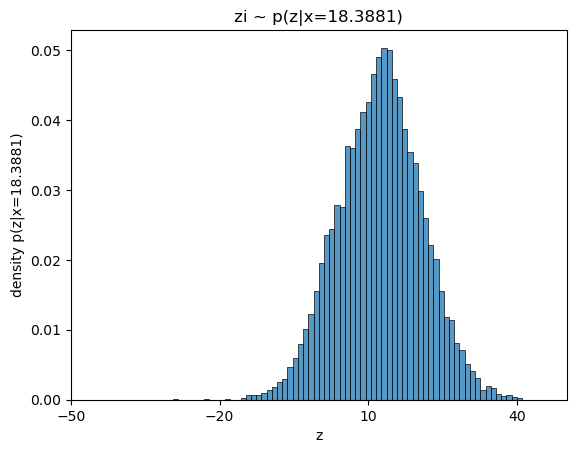

In [38]:
xi = rng.choice(x_z) # Choose one sample of x

# compute parameters for p(z|x=xi)
def posterior(x, A, N_samples=10000): 
    
    mu_z_x = (sigma_z**(-2) * mu_z + sigma_x_z**(-2) * x)/(sigma_z**(-2) + sigma_x_z**(-2))
    sigma_z_x = (1/(sigma_z**(-2) + sigma_x_z**(-2)))**0.5
    
    return rng.normal(0.0, sigma_z_x, N_samples) + mu_z_x


zi = posterior(xi, A) # 10,000 samples of z from p(z|x=xi)
# plot z as a histogram
plot_histogram(zi, title="zi ~ p(z|x={0})".format(round(xi,4)), x_label="z", y_label="density p(z|x={0})".format(round(xi,4)),  xlim=(-50, 50), x_tick_steps=30)


In [39]:
print(f'Empirical mean = {np.mean(zi)}')
print(f'Empirical standard deviation = {np.std(zi)}')

Empirical mean = 12.321564819827861
Empirical standard deviation = 8.424302987559473


## Question 6: How does $p(z\;|\;x=x_i)$ look like? How do different samples of $x_i$ change $p(z\;|\;x=x_i)$ ? Show by plotting corresponding histograms.

In [40]:
print(f'Mean fo posterior: {(sigma_x_z**(-2) * mu_z + sigma_x_z**(-2) * xi)/(sigma_z**(-2) + sigma_x_z**(-2))}')

Mean fo posterior: 7.974188837873936


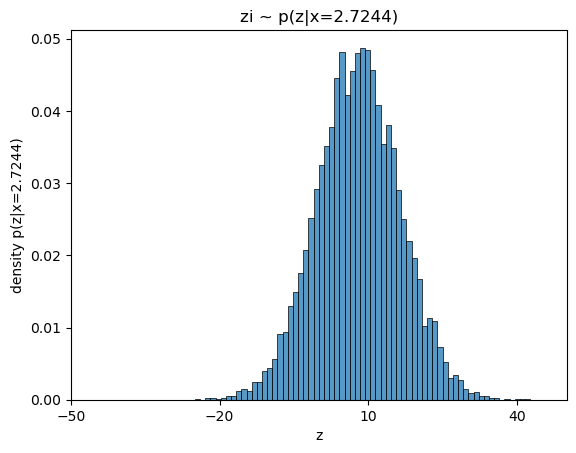

In [41]:
xi = rng.choice(x_z)
xi = x_z[1]
zi = posterior(xi, A) # 10,000 samples of z from p(z|x=xi)
# plot z as a histogram
plot_histogram(zi, title="zi ~ p(z|x={0})".format(round(xi,4)), x_label="z", y_label="density p(z|x={0})".format(round(xi,4)), xlim=(-50, 50), x_tick_steps=30)

In [33]:
print(f'Empirical mean = {np.mean(zi)}')
print(f'Empirical standard deviation = {np.std(zi)}')

Empirical mean = 7.869762850797092
Empirical standard deviation = 8.507864254394566


### Now choose all of the 10000 samples of $x$ from $p(x\;|\;z)$ from above and correspondingly draw 10,000 samples from the posterior distribution $p(z\;|\;x)$ such that one sample z|x corresponds to one x. Plot the 10,000 $z$ samples as a histogram.

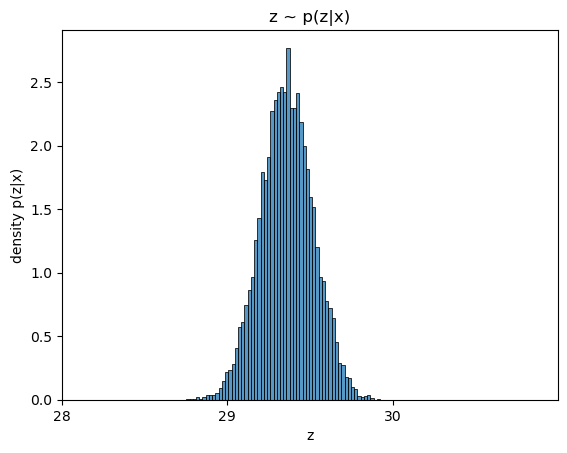

In [53]:
# compute parameters for p(z|x)
def posterior(x, A, N_samples=10000): 
    
    mu_z_x = (sigma_z**(-2) * mu_z + sigma_x_z**(-2) * x)/(sigma_z**(-2) + sigma_x_z**(-2))
    sigma_z_x = (1/(sigma_z**(-2) + sigma_x_z**(-2)))**0.5
    
    return rng.normal(0.0, sigma_z_x, N_samples) + mu_z_x

def full_posterior(x, sigma_z, sigma_x_z, mu_z, A, N_samples=10000):
    
    sigma_z_x = (1/(sigma_z**(-2) + N_samples*sigma_x_z**(-2)))**0.5
    mu_z_x = (sigma_z**(-2) * mu_z + (sigma_x_z**(-2) * np.sum(x))) * (sigma_z_x**2)
    
    
    return rng.normal(0.0, sigma_z_x, N_samples) + mu_z_x

z_full = full_posterior(x_z, sigma_z, sigma_x_z, mu_z, A) # sample from p(z|x), one z sample per x sample.
# plot samples of z as a histogram.
plot_histogram(z_full, title="z ~ p(z|x)", x_label="z", y_label="density p(z|x)", xlim=(28, 31), x_tick_steps=1)


In [51]:
print(f'Empirical mean = {np.mean(z_full)}')
print(f'Empirical standard deviation = {np.std(z_full)}')

Empirical mean = 29.360038453175708
Empirical standard deviation = 0.1592682424000595


## Question 7 How does $p(z\;|\;x)$ look like now, considering all of $x$ and one $z$ sample per $x$ sample? Is it different from 6? Why? Elaborate.

P(z|x) also follows a gaussian distribution, but with *empitrical mean* = 11.25482359067268 and *standard deviation* = 73.03030507471084. The standard deviation of the full posterior is very similar compared to the other two posteriors with only one given value. Using a single value to condition on has a high inpact on the location of the posterior.